In [10]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pylab as plt

SMALL_SIZE = 14
MEDIUS_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams["font.family"] = "serif"
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUS_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

gammar = 5596.880474356758
betar  = 0.9999999840383441
frev   = 11245.
circum = 26658.883
c = 3e8

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [61]:
df_python = pd.read_parquet('output/IBS_output_python.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/IBS_output_BLonD.parquet', engine='pyarrow')#[:350]

In [65]:
index = np.where(df_blond['epsn_x'] == 0)[0][0]
print(index)

12


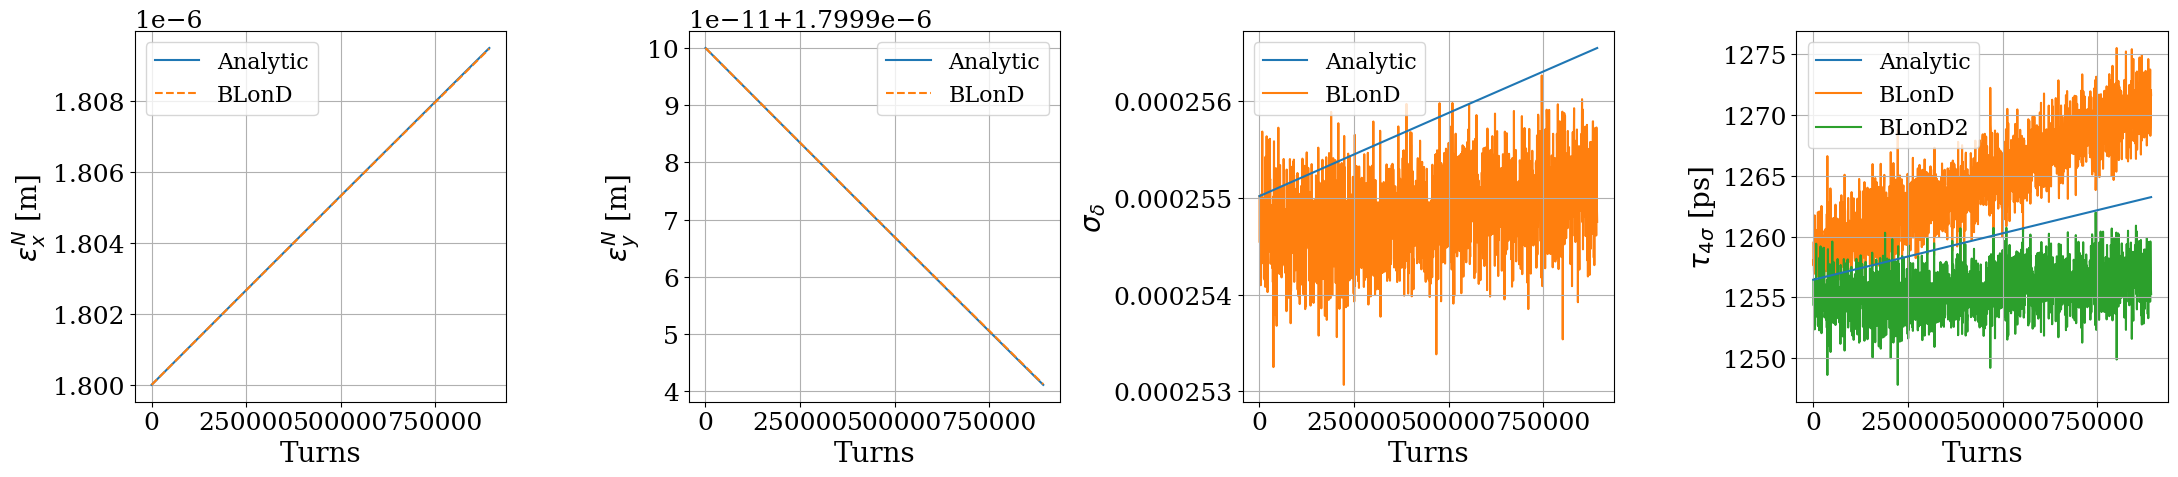

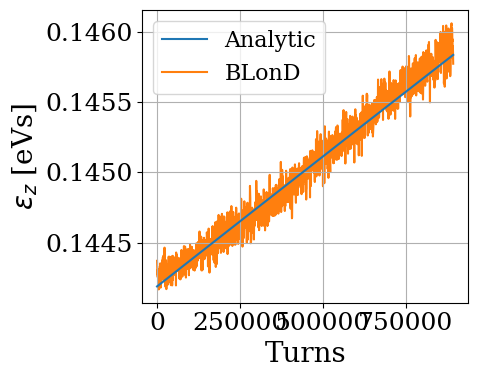

In [228]:
df_python = pd.read_parquet('output/IBS_output_python_gaussian2.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/IBS_output_BLonD_guassian2.parquet', engine='pyarrow')#[:350]

f, ax = plt.subplots(1, 4, figsize=(22,5))

index = -1
index = np.where(df_blond['epsn_x'] == 0)[0][0]

ax[0].plot(df_python['time'][:index] * frev, df_python['epsn_x'][:index], label = 'Analytic')
ax[0].plot(df_blond['time'][:index] * frev, df_blond['epsn_x'][:index], ls = '--', label = 'BLonD')

ax[1].plot(df_python['time'][:index] * frev, df_python['epsn_y'][:index], label = 'Analytic')
ax[1].plot(df_blond['time'][:index] * frev, df_blond['epsn_y'][:index], ls = '--', label = 'BLonD')

ax[2].plot(df_python['time'][:index] * frev, df_python['deltaE'][:index], label = 'Analytic')
ax[2].plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index], label = 'BLonD', zorder = 1)

ax[3].plot(df_python['time'][:index] * frev, df_python['tau_ns'][:index] * 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns'][:index] * 1e12, label = 'BLonD', zorder = 1)
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns2'][:index] * 1e12, label = 'BLonD2', zorder = 1)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()


f1, ax = plt.subplots(1, figsize=(5,4))

ax.plot(df_python['time'][:index] * frev, df_python['deltaE'][:index] * 450e9 * df_python['tau_ns'][:index], label = 'Analytic')
ax.plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index] * 450e9 * df_blond['tau_ns'][:index], label = 'BLonD', zorder = 1)

ax.grid()
ax.legend()
ax.set_xlabel('Turns')
ax.set_ylabel(r'$\varepsilon_z$ [eVs]')
f1.tight_layout()




# plt.savefig('figures/emittance_evolution_gaussian.png')

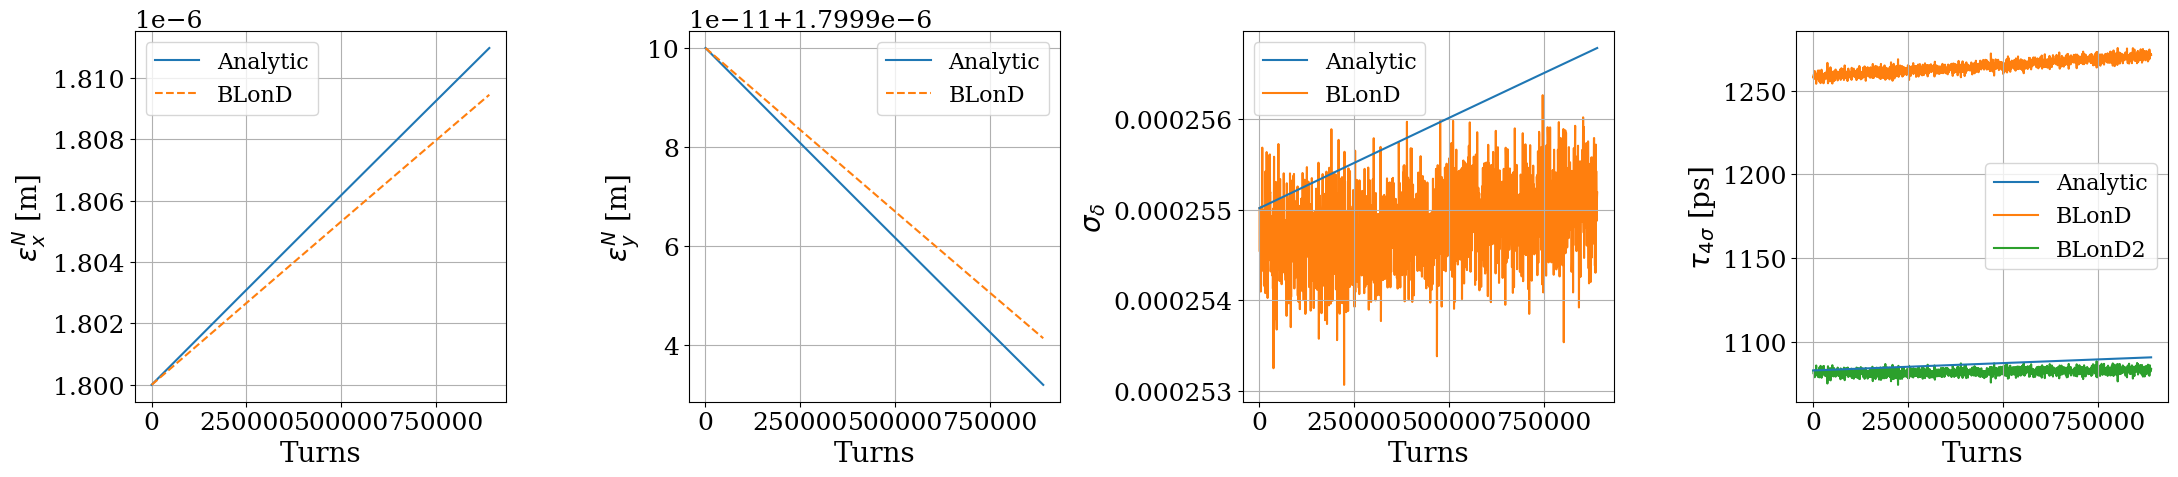

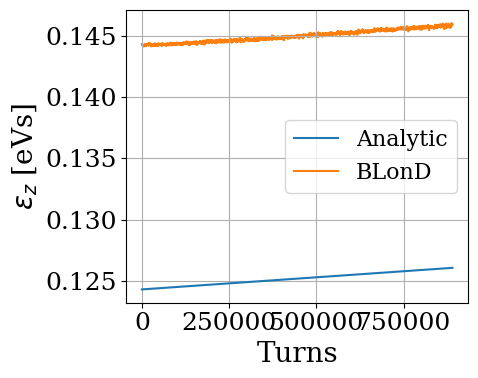

In [227]:
df_python = pd.read_parquet('output/IBS_output_python_gaussian.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/IBS_output_BLonD_guassian.parquet', engine='pyarrow')#[:350]

f, ax = plt.subplots(1, 4, figsize=(22,5))

index = -1
index = np.where(df_blond['epsn_x'] == 0)[0][0]

ax[0].plot(df_python['time'][:index] * frev, df_python['epsn_x'][:index], label = 'Analytic')
ax[0].plot(df_blond['time'][:index] * frev, df_blond['epsn_x'][:index], ls = '--', label = 'BLonD')

ax[1].plot(df_python['time'][:index] * frev, df_python['epsn_y'][:index], label = 'Analytic')
ax[1].plot(df_blond['time'][:index] * frev, df_blond['epsn_y'][:index], ls = '--', label = 'BLonD')

ax[2].plot(df_python['time'][:index] * frev, df_python['deltaE'][:index], label = 'Analytic')
ax[2].plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index], label = 'BLonD', zorder = 1)

ax[3].plot(df_python['time'][:index] * frev, df_python['tau_ns'][:index] * 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns'][:index] * 1e12, label = 'BLonD', zorder = 1)
ax[3].plot(df_blond['time'][:index] * frev,  df_blond['tau_ns2'][:index] * 1e12, label = 'BLonD2', zorder = 1)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()


f1, ax = plt.subplots(1, figsize=(5,4))

ax.plot(df_python['time'][:index] * frev, df_python['deltaE'][:index] * 450e9 * df_python['tau_ns'][:index], label = 'Analytic')
ax.plot(df_blond['time'][:index] * frev,  df_blond['deltaE'][:index] * 450e9 * df_blond['tau_ns'][:index], label = 'BLonD', zorder = 1)

ax.grid()
ax.legend()
ax.set_xlabel('Turns')
ax.set_ylabel(r'$\varepsilon_z$ [eVs]')
f1.tight_layout()

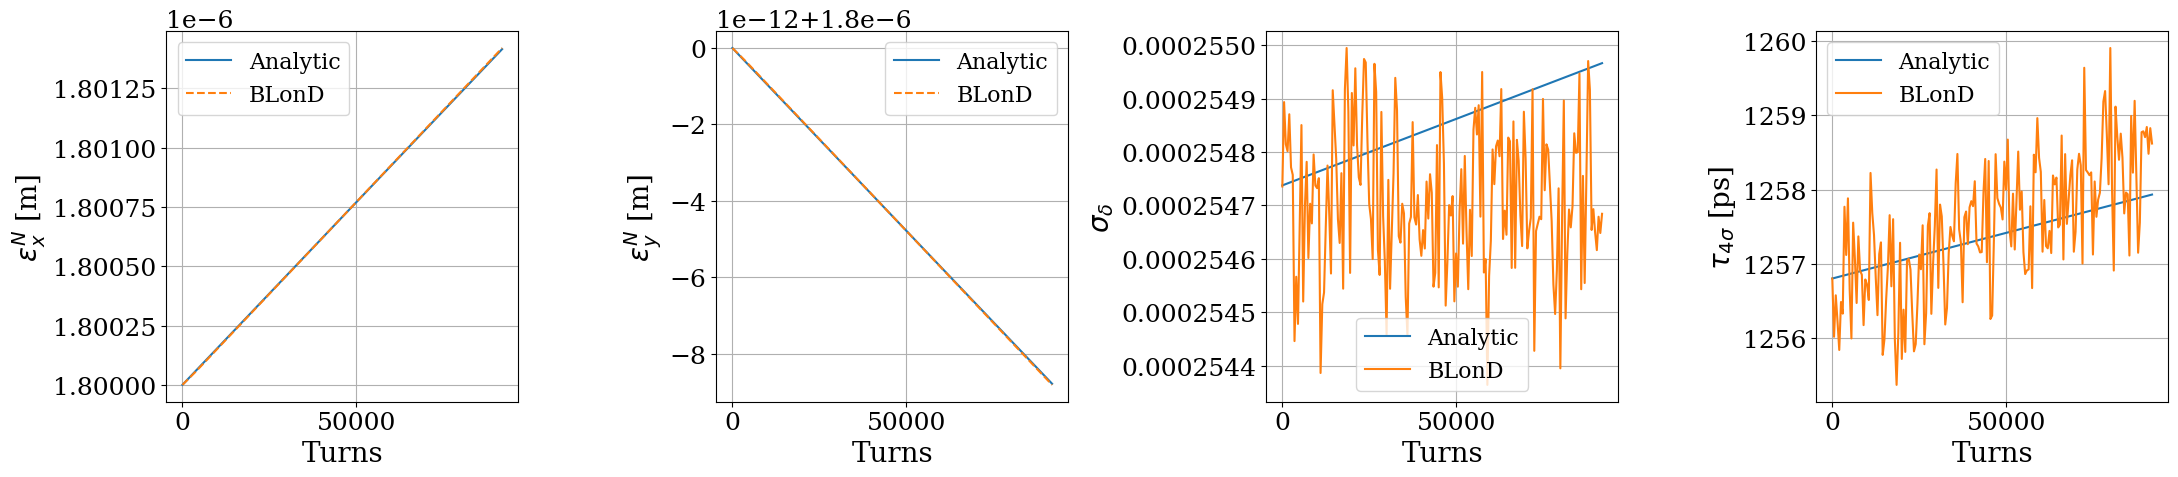

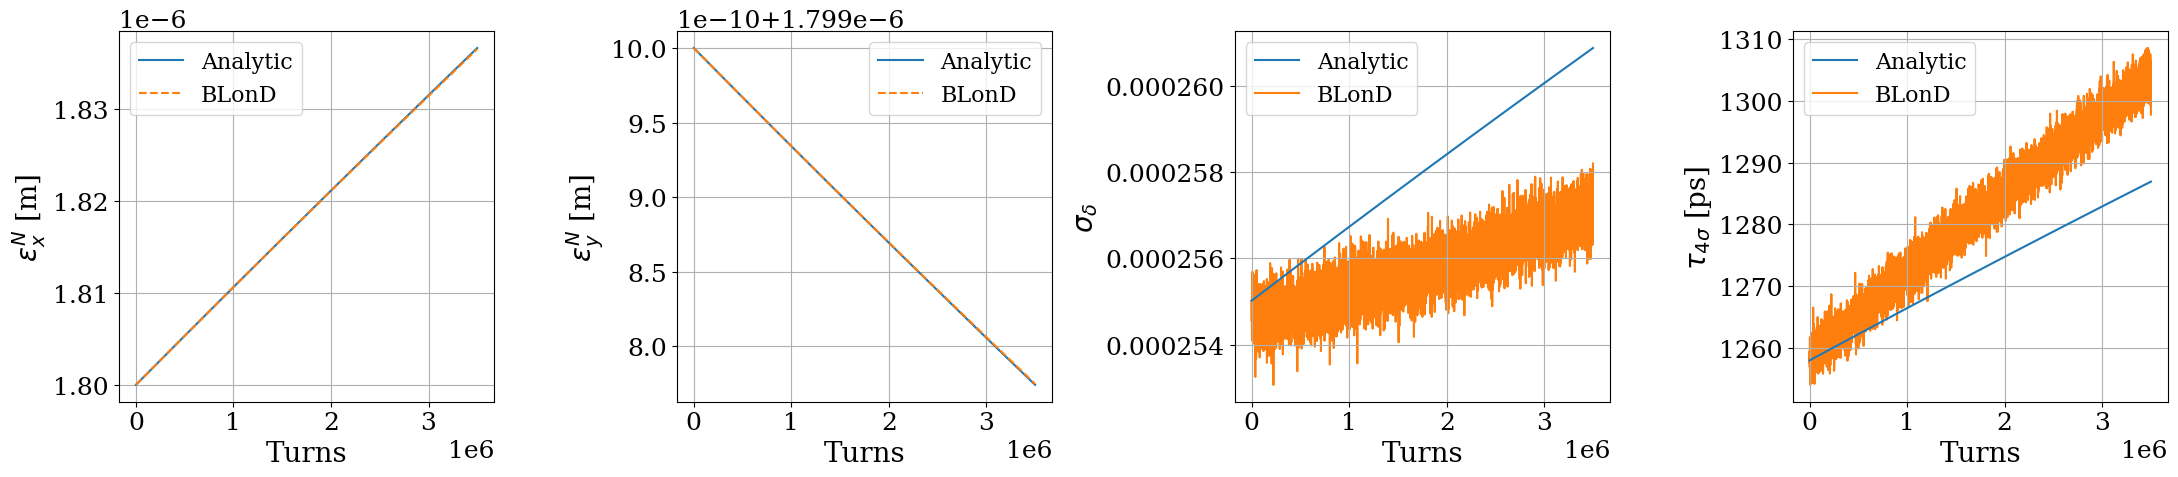

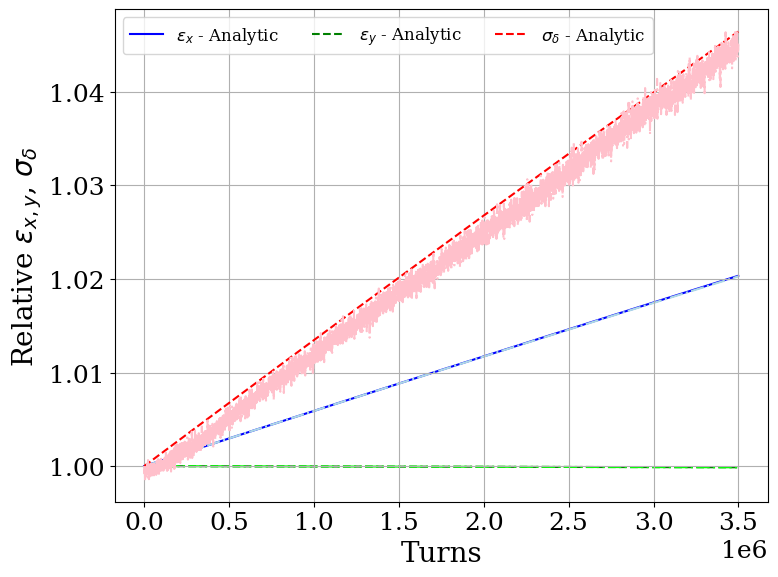

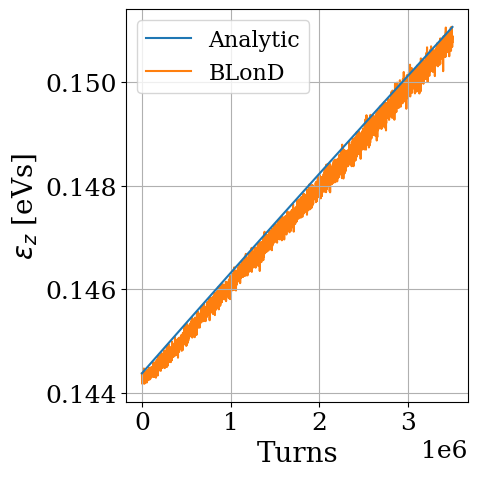

In [207]:
df_python = pd.read_parquet('output/tau_1.2ns/IBS_output_python.parquet', engine='pyarrow')
df_blond  = pd.read_parquet('output/tau_1.2ns/IBS_output_BLonD_1.parquet', engine='pyarrow')#[:350]

f, ax = plt.subplots(1, 4, figsize=(22,5))

ax[0].plot(df_python['time'] * frev, df_python['epsn_x'], label = 'Analytic')
ax[0].plot(df_blond['time'] * frev, df_blond['epsn_x'], ls = '--', label = 'BLonD')

ax[1].plot(df_python['time'] * frev, df_python['epsn_y'], label = 'Analytic')
ax[1].plot(df_blond['time'] * frev, df_blond['epsn_y'], ls = '--', label = 'BLonD')

ax[2].plot(df_python['time'] * frev, df_python['deltaE'], label = 'Analytic')
ax[2].plot(df_blond['time'] * frev,  df_blond['deltaE'], label = 'BLonD', zorder = 1)

ax[3].plot(df_python['time'] * frev, df_python['tau_ns'] * 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'] * frev,  df_blond['tau_ns'] * 1e12, label = 'BLonD', zorder = 1)

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()


f1, ax = plt.subplots(1, figsize=(8,6))

lns2 = ax.plot(df_python['time'] * frev, df_python['epsn_x'] / df_python['epsn_x'][0], 
               'blue', ls = '-', label = r'$\varepsilon_x$ - Analytic', zorder = 1)

lns4 = ax.plot(df_python['time'] * frev, df_python['epsn_y'] / df_python['epsn_y'][0], 
               'green', ls = '--', label = r'$\varepsilon_y$ - Analytic', zorder = 1)

lns6 = ax.plot(df_python['time'] * frev,  df_python['deltaE'] * df_python['tau_ns'] / df_python['deltaE'][0] / df_python['tau_ns'][0], 
               'red', ls = '--', label = r'$\sigma_{\delta}$ - Analytic', zorder = 9)


lns7 = ax.plot(df_blond['time'] * frev, df_blond['epsn_x'] / df_blond['epsn_x'][0], 
               'lightblue', ls = '-.', label = r'$\varepsilon_x$ - BLonD', zorder = 1)

lns8 = ax.plot(df_blond['time'] * frev, df_blond['epsn_y'] / df_blond['epsn_y'][0], 
               'lime', ls = '-.', label = r'$\varepsilon_y$ - BLonD', zorder = 1)

lns9 = ax.plot(df_blond['time'] * frev,  df_blond['deltaE'] * df_blond['tau_ns'] / df_blond['deltaE'][0] / df_blond['tau_ns'][0], 
               'pink', ls = '-.', label = r'$\sigma_{\delta}$ - BLonD', zorder = 9)

ax.grid()
# ax.set_xlim(-500, 14200)
ax.set_ylabel('Relative $\epsilon_{x,y}$, $\sigma_{\delta}$')
ax.set_xlabel('Turns')

# lns = lns1 + lns3 + lns5 + lns2 + lns4 + lns6 + lns7+ lns8+ lns9
lns = lns2 + lns4 + lns6
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, ncols = 3, fontsize = 12)

f1.tight_layout()
# plt.savefig('figures/relative_mean_emittance_evolution.png')



f2, ax = plt.subplots(1, figsize=(5,5))

ax.plot(df_python['time'] * frev, df_python['deltaE'] * 450e9 * df_python['tau_ns'], label = 'Analytic')
ax.plot(df_blond['time'] * frev,  df_blond['deltaE'] * 450e9 * df_blond['tau_ns'], label = 'BLonD', zorder = 1)

ax.grid()
ax.legend()
ax.set_xlabel('Turns')
ax.set_ylabel(r'$\varepsilon_z$ [eVs]')
f2.tight_layout()




# plt.savefig('figures/emittance_evolution_gaussian.png')

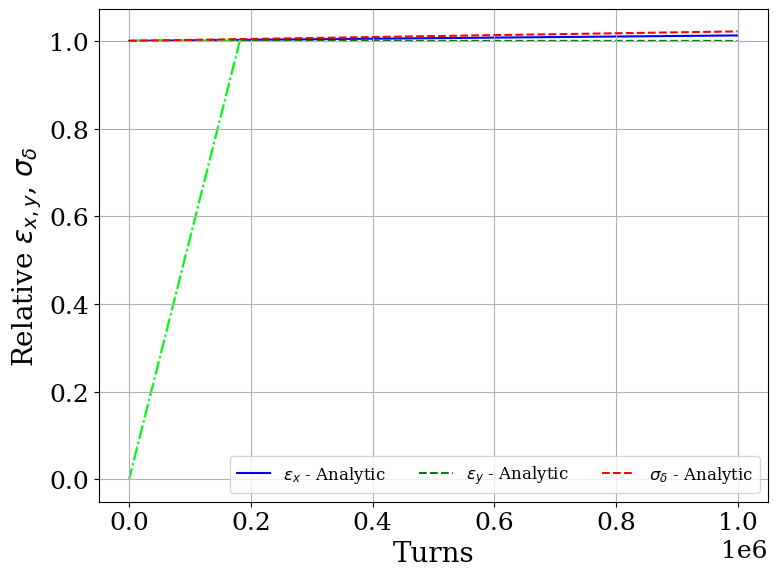

In [151]:
f, ax = plt.subplots(1, figsize=(8,6))

lns2 = ax.plot(df_python['time'] * frev, df_python['epsn_x'] / df_python['epsn_x'][0], 
               'blue', ls = '-', label = r'$\varepsilon_x$ - Analytic', zorder = 1)

lns4 = ax.plot(df_python['time'] * frev, df_python['epsn_y'] / df_python['epsn_y'][0], 
               'green', ls = '--', label = r'$\varepsilon_y$ - Analytic', zorder = 1)

lns6 = ax.plot(df_python['time'] * frev,  df_python['deltaE'] / df_python['deltaE'][0], 
               'red', ls = '--', label = r'$\sigma_{\delta}$ - Analytic', zorder = 9)


lns7 = ax.plot(df_blond['time'] * frev, df_blond['epsn_x'] / df_blond['epsn_x'][0], 
               'lightblue', ls = '-.', label = r'$\varepsilon_x$ - BLonD', zorder = 1)

lns8 = ax.plot(df_blond['time'] * frev, df_blond['epsn_y'] / df_blond['epsn_y'][0], 
               'lime', ls = '-.', label = r'$\varepsilon_y$ - BLonD', zorder = 1)

# lns9 = ax.plot(df_blond['time'] * frev,  df_blond['deltaE'] / df_blond['deltaE'][0], 
#                'pink', ls = '-.', label = r'$\sigma_{\delta}$ - BLonD', zorder = 9)



ax.grid()
# ax.set_xlim(-500, 14200)
ax.set_ylabel('Relative $\epsilon_{x,y}$, $\sigma_{\delta}$')
ax.set_xlabel('Turns')

# lns = lns1 + lns3 + lns5 + lns2 + lns4 + lns6 + lns7+ lns8+ lns9
lns = lns2 + lns4 + lns6
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0, ncols = 3, fontsize = 12)

plt.tight_layout()
# plt.savefig('figures/relative_mean_emittance_evolution.png')

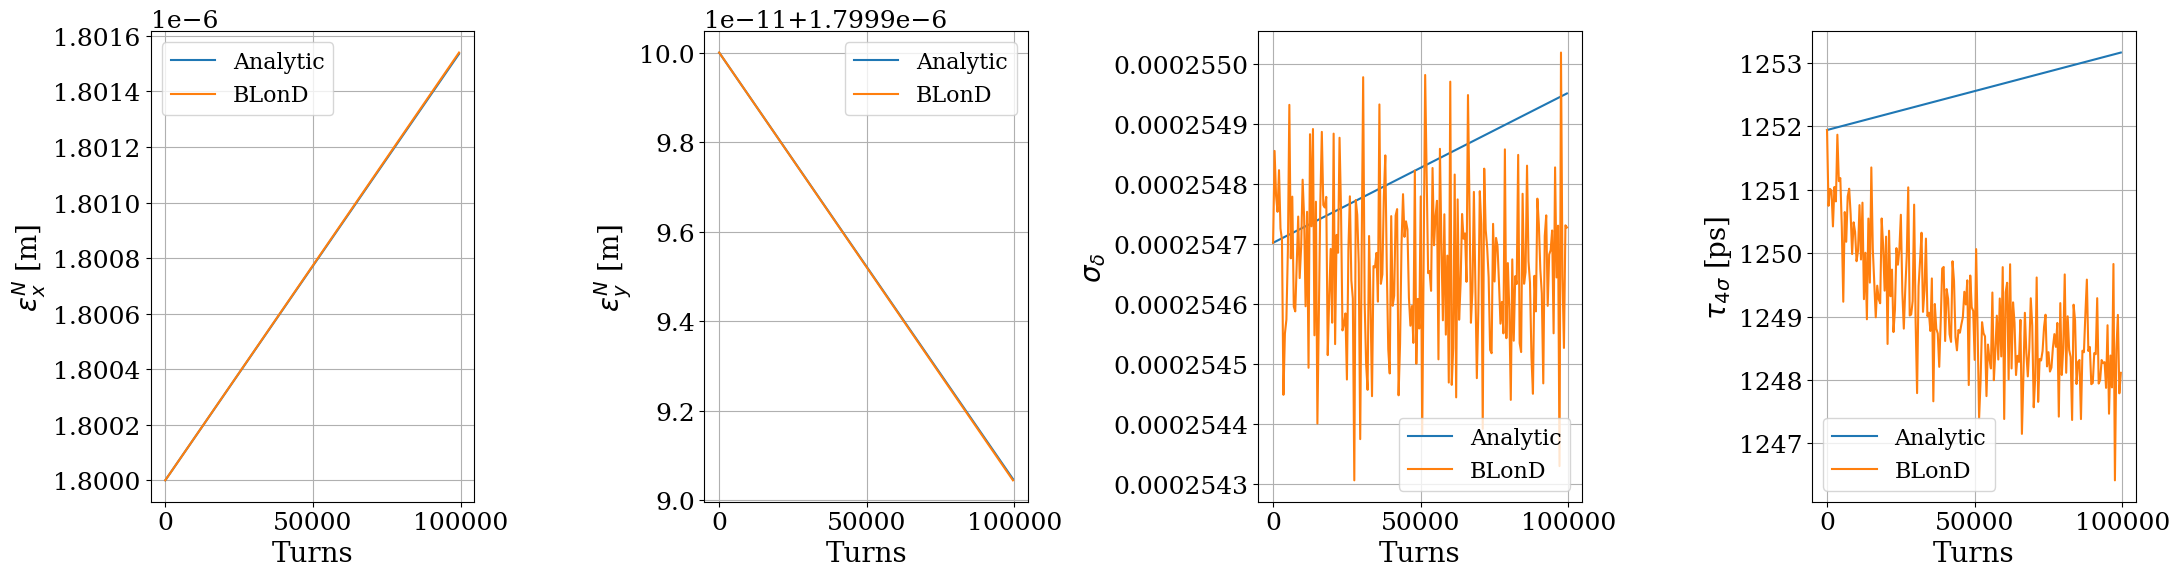

In [60]:
f, ax = plt.subplots(1, 4, figsize=(22,6))

ax[0].plot(df_python['time'] * frev, df_python['epsn_x'], label = 'Analytic')
ax[0].plot(df_blond['time'] * frev, df_blond['epsn_x'], label = 'BLonD')

ax[1].plot(df_python['time'] * frev, df_python['epsn_y'], label = 'Analytic')
ax[1].plot(df_blond['time'] * frev, df_blond['epsn_y'], label = 'BLonD')

ax[2].plot(df_python['time'] * frev, df_python['deltaE'], label = 'Analytic')
ax[2].plot(df_blond['time'] * frev,  df_blond['deltaE'], label = 'BLonD')


ax[3].plot(df_python['time'] * frev, df_python['tau_ns']* 1e12, label = 'Analytic')
ax[3].plot(df_blond['time'] * frev,  df_blond['tau_ns']* 1e12, label = 'BLonD')

for i in range(len(ax)):
    ax[i].grid()
    ax[i].legend()
    ax[i].set_xlabel('Turns')

ax[0].set_ylabel(r'$\varepsilon^N_x$ [m]')
ax[1].set_ylabel(r'$\varepsilon^N_y$ [m]')
ax[2].set_ylabel(r'$\sigma_\delta$')
ax[3].set_ylabel(r'$\tau_{4\sigma}$ [ps]')

f.tight_layout()
plt.savefig('figures/emittance_evolution_gaussian.png')


In [16]:
print(f"{df_python['epsn_x'][0]:.10e}, {df_python['epsn_y'][0]:.10e}, {df_python['deltaE'][0] / betar**2:.10f},",
      f"{df_python['tau_ns'][0]:.10e}, {df_python['tau_ns'][0] * c * betar / 4:.10f}")

# print(f"{df_blond['epsn_x'][0]:.10e}, {df_blond['epsn_y'][0]:.10e}, {df_blond['deltaE'][0] / betar**2:.10f},",
#       f"{df_blond['tau_ns'][0]:.10e}, {df_blond['tau_ns'][0] * c * betar / 4:.10f}")

1.8000000000e-06, 1.8000000000e-06, 0.0002547019, 1.2519413780e-09, 0.0938956019


In [28]:
df_python

,time,epsn_x,epsn_y,tau_ns,deltaE
0,0.000000,0.000002,0.000002,1.251941e-09,0.000255
1,0.044462,0.000002,0.000002,1.251948e-09,0.000255
2,0.088925,0.000002,0.000002,1.251954e-09,0.000255
3,0.133387,0.000002,0.000002,1.251960e-09,0.000255
4,0.177849,0.000002,0.000002,1.251966e-09,0.000255
...,...,...,...,...,...
995,44.240016,0.000002,0.000002,1.258013e-09,0.000256
996,44.284479,0.000002,0.000002,1.258019e-09,0.000256
997,44.328941,0.000002,0.000002,1.258025e-09,0.000256
998,44.373403,0.000002,0.000002,1.258031e-09,0.000256


In [31]:
df_blond['epsn_x']

0      0.000002
1      0.000002
2      0.000002
3      0.000002
4      0.000002
         ...   
145    0.000002
146    0.000002
147    0.000002
148    0.000002
149    0.000002
Name: epsn_x, Length: 150, dtype: float64